In [1]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2021-11-12 17:21:33--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-11-12 17:21:36--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-11-12 17:21:36--  http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving nchc.dl.sourceforge.n

In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 6.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=6950558cc5f9e6d538c5ba57cda94cf7561c8ba15e0349ce44c750c93972b9d6
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
import talib as ta

In [7]:
symbol = 'JPPOWER.NS'
start = '2019-11-12'
end = '2021-11-11'
df = yf.download(symbol,start,end)

[*********************100%***********************]  1 of 1 completed


In [11]:
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df = df.dropna()
# macdsignal is the signal line and the macd is the macd line and macdhist is the diff between them

In [12]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,macd,macdsignal,macdhist
Date,,,,,,,,,
2020-04-07,0.75,0.75,0.75,0.75,0.75,1650593,-0.208555,-0.296934,0.088379
2020-04-08,0.80,0.80,0.80,0.80,0.80,2756613,-0.180806,-0.273708,0.092902
2020-04-09,0.85,0.85,0.75,0.85,0.85,29727614,-0.153017,-0.249570,0.096553
2020-04-13,0.90,0.90,0.80,0.85,0.85,12670748,-0.129501,-0.225556,0.096056
2020-04-15,0.85,0.85,0.80,0.80,0.80,6967519,-0.113589,-0.203163,0.089574


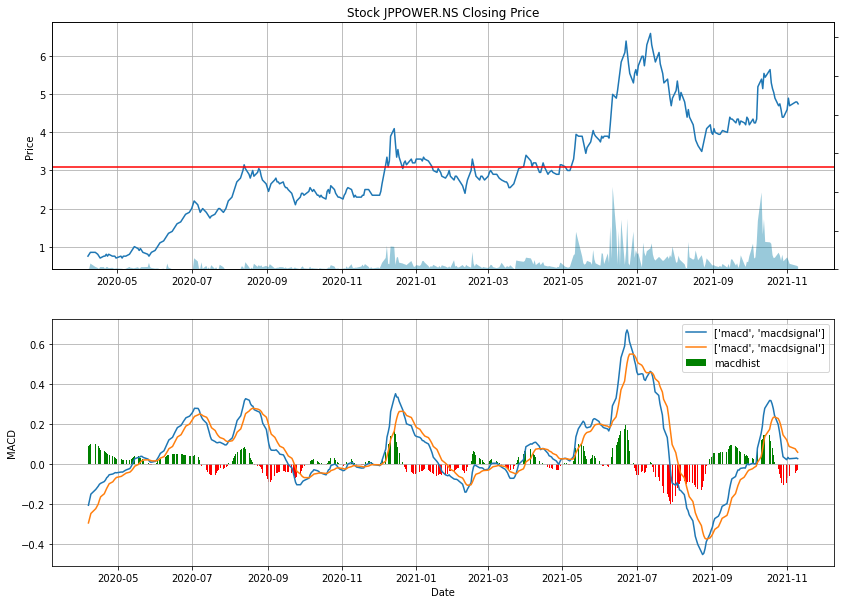

In [14]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj Close'])
ax1.axhline(y=df['Adj Close'].mean(),color='r')
ax1.grid()
#ax1.grid(True, which='both')
#ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
#ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#ax1.minorticks_on()
#ax1.legend(loc='best')
ax1v = ax1.twinx()
ax1v.fill_between(df.index[0:],0, df.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

labels = ['macd','macdsignal']
ax2 = plt.subplot(2, 1, 2)
df['positive'] = df['macdhist'] > 0
ax2.plot(df[['macd','macdsignal']], label=labels)
ax2.bar(df.index, df['macdhist'], color=df.positive.map({True: 'g', False: 'r'}), label='macdhist')
ax2.grid()
ax2.set_ylabel('MACD')
ax2.set_xlabel('Date')
ax2.legend(loc='best')